# Volatility Stops

https://www.motivewave.com/studies/volatility_stops.htm

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2019-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.047050,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.257286,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.719700,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.640202,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.319603,164101200


In [3]:
# Calculate TSI
def volatility_stops(df, pos='long', price='Close', ma='EMA', maP=63, artP=21, fac=3):
    """
    Calculates the Volatility Stops indicator for a given pandas DataFrame.
    
    Parameters:
    df (pandas DataFrame): DataFrame containing price data.
    pos (str): Position type ('long' or 'short'). Default is 'long'.
    price (str): Column name of price data. Default is 'Close'.
    ma (str): Moving average type ('SMA' or 'EMA'). Default is 'EMA'.
    maP (int): Moving average period. Default is 63.
    artP (int): Average True Range period. Default is 21.
    fac (float): Factor multiplier. Default is 3.
    
    Returns:
    pandas DataFrame: A DataFrame with the Volatility Stops values.
    """
    
    # Calculate the average true range
    df['TR'] = np.maximum(np.maximum(df['High']-df['Low'], abs(df['High']-df['Close'].shift())), abs(df['Low']-df['Close'].shift()))
    df['ATR'] = df['TR'].rolling(window=artP).mean()
    
    # Calculate the direction of the position
    if pos == 'long':
        direction = 1
    elif pos == 'short':
        direction = -1
    
    # Calculate the moving average
    if ma == 'SMA':
        df['MA'] = df[price].rolling(window=maP).mean()
    elif ma == 'EMA':
        df['MA'] = df[price].ewm(span=maP).mean()
    
    # Calculate the Volatility Stops
    df['Volatility Stops'] = df['MA'] + direction * fac * df['ATR']
    
    # Remove unnecessary columns
    df = df.drop(['TR', 'ATR', 'MA'], axis=1)
    
    return df[['Volatility Stops']]
    

df['VS'] = volatility_stops(df)



In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,Volatility Stops,VS
Date,,,,,,,,,,,
2019-02-01,41.740002,42.244999,41.482498,41.630001,40.119015,130672400,0.762501,1.167262,38.901132,42.402919,42.402919
2019-02-04,41.852501,42.915001,41.820000,42.812500,41.258591,125982000,1.285000,1.038929,39.137008,42.253795,42.253795
2019-02-05,43.215000,43.770000,43.087502,43.544998,41.964500,144406400,0.957500,1.008810,39.395327,42.421757,42.421757
2019-02-06,43.662498,43.892502,43.212502,43.560001,41.978962,112958400,0.680000,1.006310,39.632890,42.651820,42.651820
2019-02-07,43.099998,43.485001,42.584999,42.735001,41.183903,126966800,0.975002,1.006429,39.805392,42.824679,42.824679


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,Volatility Stops,VS
Date,,,,,,,,,,,
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517097,48478800,0.492500,1.047976,63.910400,67.054329,67.054329
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200,1.427505,1.060476,64.178221,67.359650,67.359650
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869415,146266000,1.462502,1.074643,64.436806,67.660736,67.660736
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290047,144114400,1.867500,1.119643,64.700747,68.059677,68.059677
2019-12-31,72.482498,73.419998,72.379997,73.412498,71.810936,100805600,1.040001,1.144167,64.973081,68.405581,68.405581


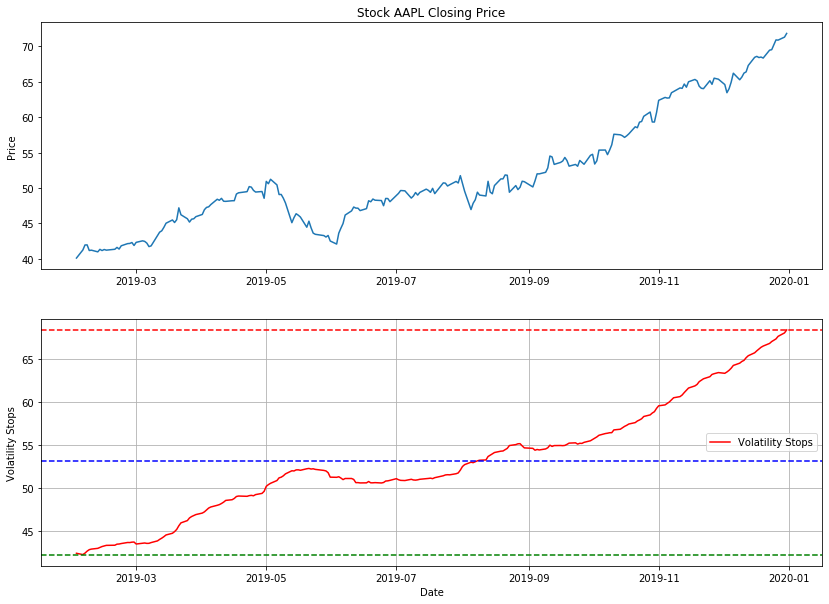

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['VS'], label='Volatility Stops', color='red')
ax2.axhline(y=df['VS'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['VS'].min(), color='green', linestyle='--')
ax2.axhline(y=df['VS'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volatility Stops')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

<Figure size 432x288 with 0 Axes>

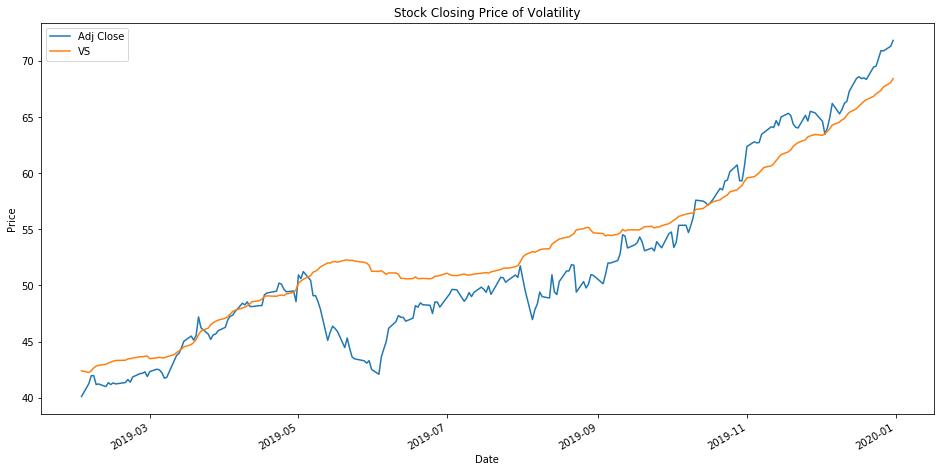

In [7]:
plt.figure()
df[['Adj Close', 'VS']].plot(figsize=(16,8))
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Stock Closing Price of Volatility')
plt.legend(loc='best') 

## Candlestick with Volatility Stops

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TR,ATR,MA,Volatility Stops,VS,VolumePositive
0,737091.0,41.740002,42.244999,41.482498,41.630001,40.119015,130672400,0.762501,1.167262,38.901132,42.402919,42.402919,False
1,737094.0,41.852501,42.915001,41.820000,42.812500,41.258591,125982000,1.285000,1.038929,39.137008,42.253795,42.253795,False
2,737095.0,43.215000,43.770000,43.087502,43.544998,41.964500,144406400,0.957500,1.008810,39.395327,42.421757,42.421757,False
3,737096.0,43.662498,43.892502,43.212502,43.560001,41.978962,112958400,0.680000,1.006310,39.632890,42.651820,42.651820,False
4,737097.0,43.099998,43.485001,42.584999,42.735001,41.183903,126966800,0.975002,1.006429,39.805392,42.824679,42.824679,False


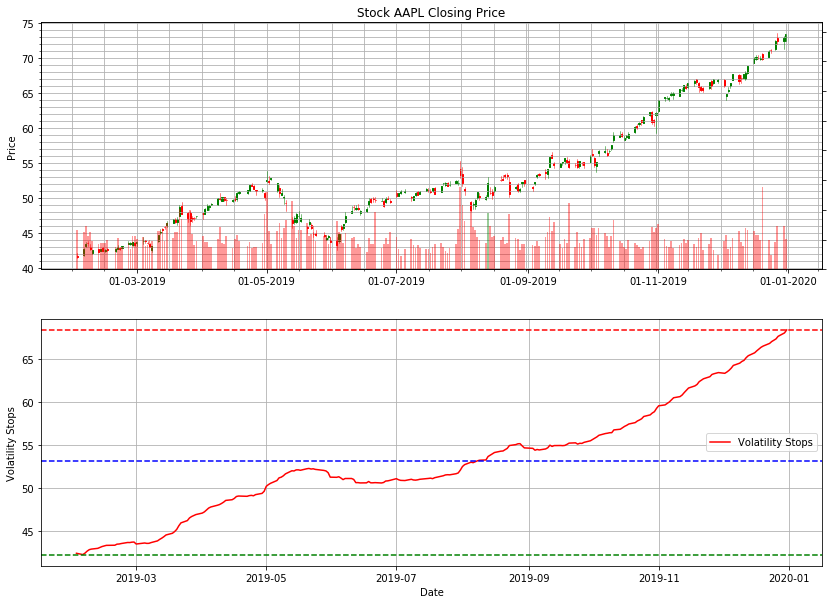

In [9]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['VS'], label='Volatility Stops', color='red')
ax2.axhline(y=df['VS'].mean(), color='blue', linestyle='--')
ax2.axhline(y=df['VS'].min(), color='green', linestyle='--')
ax2.axhline(y=df['VS'].max(), color='red', linestyle='--')
ax2.grid()
ax2.set_ylabel('Volatility Stops')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

Text(0.5, 0, 'Date')

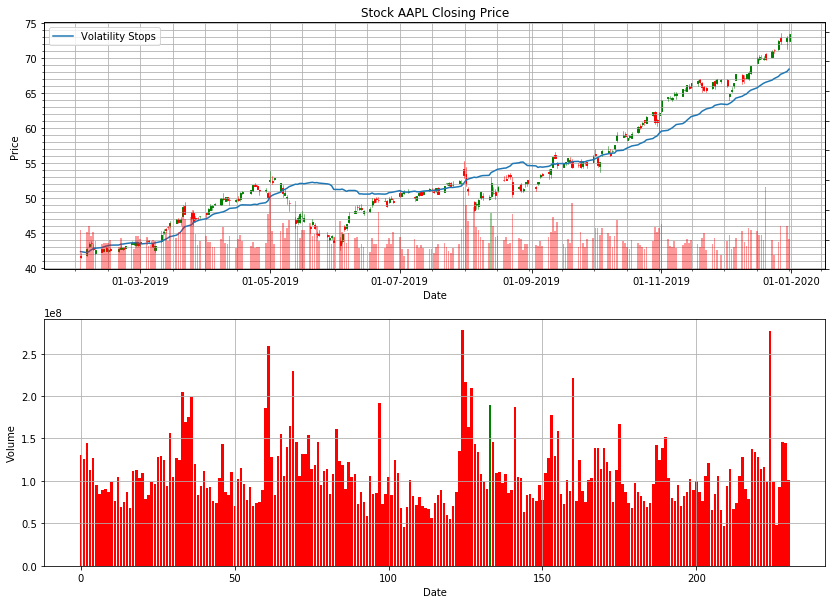

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df['VS'], label='Volatility Stops')
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.legend(loc='best')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(dfc.index, dfc['Volume'], color=dfc.VolumePositive.map({True: 'g', False: 'r'}))
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')